# Stock Market Prediction and Forecasting using Stacked LSTM

# Process Step

1. Import Dataset
2. Data Preparation
3. Visualize Dataset 
4. Training the Module
5. Prediction
6. Model Evaluation

# Import Dataset

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read DataSet

a=pd.read_csv('D:\Intern Work\LetsGrowMore\Stock  Market\TATAGLOBAL.csv')
a

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
a.head(25)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
a.tail(25)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2010,2010-08-24,118.45,119.80,116.05,116.75,116.45,3422797,4032.37
2011,2010-08-23,114.00,118.25,112.00,116.65,116.70,4033916,4697.91
2012,2010-08-20,112.00,113.40,111.05,111.35,111.50,653286,732.65
2013,2010-08-19,110.00,114.35,108.50,113.35,113.05,1643818,1846.35
2014,2010-08-18,110.15,111.20,108.10,108.50,108.85,959932,1052.23
2015,2010-08-17,111.90,112.40,109.70,110.20,110.10,1079479,1196.57
2016,2010-08-16,115.95,115.95,110.75,112.00,111.25,818831,919.52
2017,2010-08-13,113.40,116.00,112.60,114.10,114.15,755675,868.71
2018,2010-08-12,113.00,114.45,112.25,112.80,112.55,434265,492.18
2019,2010-08-11,113.75,115.50,112.00,113.90,113.90,1307966,1499.66


In [5]:
#Display basic Statistics 
a.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Data Preparation

In [6]:
#Null values in data
Nan = [(c,a[c].isnull().mean()*100) for c in a]
Nan = pd.DataFrame(Nan,columns=['ColName','Percentage'])
Nan

,ColName,Percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [7]:
#Sort by Date
s=a.sort_values(by='Date')
s.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
s.reset_index(inplace=True)
s

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


# Visualize Dataset

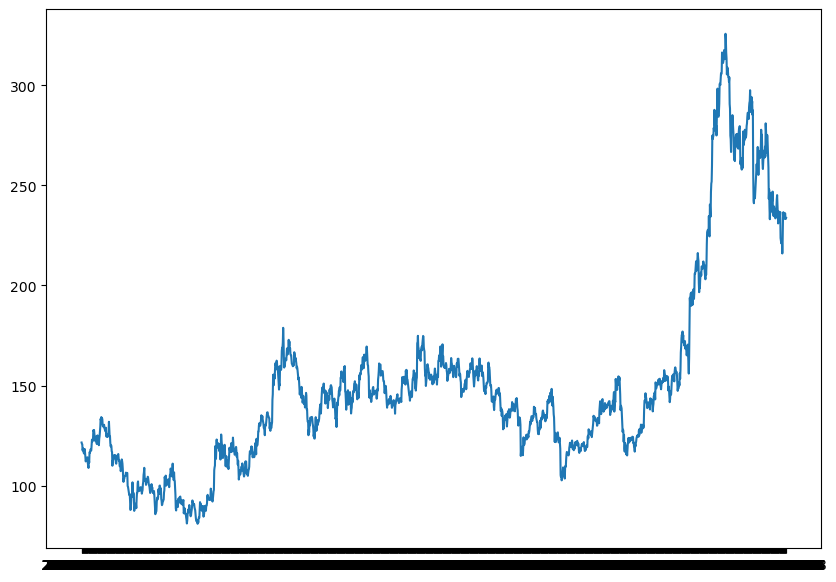

In [9]:
plt.figure(figsize=(10,7))
plt.plot(s['Date'],s['Close'])

# Training the Module

In [10]:
cls=s['Close']
cls

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [11]:
#Implementing MinMax Scaler
sca=MinMaxScaler(feature_range=(0,1))
cls=sca.fit_transform(np.array(cls).reshape(-1,1))
cls

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Creating a Training and Testing Dataset

In [12]:
#Splitting of Data to train the Module
train_size=int(len(cls)*0.7)
test_size=len(cls)-train_size
train_data,test_data=cls[0:train_size,:],cls[train_size:len(cls),:1]

#Print the Size of each Data
train_data.shape,test_data.shape

((1424, 1), (611, 1))

In [13]:
#Convertion of Array into Data Matrix
def create(data,time=1):
    dax,day=[],[]
    for i in range(len(data)-time-1):
        a=data[i:(i+time),0]
        dax.append(a)
        day.append(data[i+time,0])
    return np.array(dax),np.array(day)

# Reshaping the Dataset

In [14]:
#Reshaping of Dataset
time =100
x_train,y_train= create(train_data,time)
x_test,y_test=create(test_data,time)

x_train.shape, y_train.shape

((1323, 100), (1323,))

In [15]:
x_test.shape, y_test.shape

((510, 100), (510,))

In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

#print the reshaped dataset
x_train,x_test

(array([[[0.16584967],
         [0.16319444],
         [0.1621732 ],
         ...,
         [0.14011438],
         [0.13848039],
         [0.12479575]],
 
        [[0.16319444],
         [0.1621732 ],
         [0.14971405],
         ...,
         [0.13848039],
         [0.12479575],
         [0.12254902]],
 
        [[0.1621732 ],
         [0.14971405],
         [0.15400327],
         ...,
         [0.12479575],
         [0.12254902],
         [0.13010621]],
 
        ...,
 
        [[0.18280229],
         [0.19178922],
         [0.19219771],
         ...,
         [0.16441993],
         [0.15236928],
         [0.15482026]],
 
        [[0.19178922],
         [0.19219771],
         [0.19281046],
         ...,
         [0.15236928],
         [0.15482026],
         [0.15420752]],
 
        [[0.19219771],
         [0.19281046],
         [0.21058007],
         ...,
         [0.15482026],
         [0.15420752],
         [0.15012255]]]),
 array([[[0.1621732 ],
         [0.15951797],
         

# Creating a LSTM Model 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction

In [19]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 14s 307ms/step - loss: 0.0105 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 4s 202ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 4s 194ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 206ms/step - loss: 9.0084e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 4s 196ms/step - loss: 8.6149e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 202ms/step - loss: 8.5924e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 192ms/step - loss: 7.9005e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 202ms/step - loss: 7.4583e-04 - val_loss: 9.7208e-04
Epoch 9/60
19/19 [==============================] - 4s 204ms/step - loss: 7.3218e-04 - val_loss: 9.5127e-04
Epoch 10/60
19/19 [==============================] - 4s 206ms/step 

In [20]:
train_predic=model.predict(x_train)
test_predic=model.predict(x_test)

16/16 [==============================] - 1s 44ms/step


In [21]:
train_predic=sca.inverse_transform(train_predic)
test_predic=sca.inverse_transform(test_predic)

# Model Evaluation

In [22]:
import math
from sklearn.metrics import mean_squared_error

In [23]:
math.sqrt(mean_squared_error(y_train,train_predic))

135.5577546023541

In [24]:
math.sqrt(mean_squared_error(y_test,test_predic))

208.62757921576252

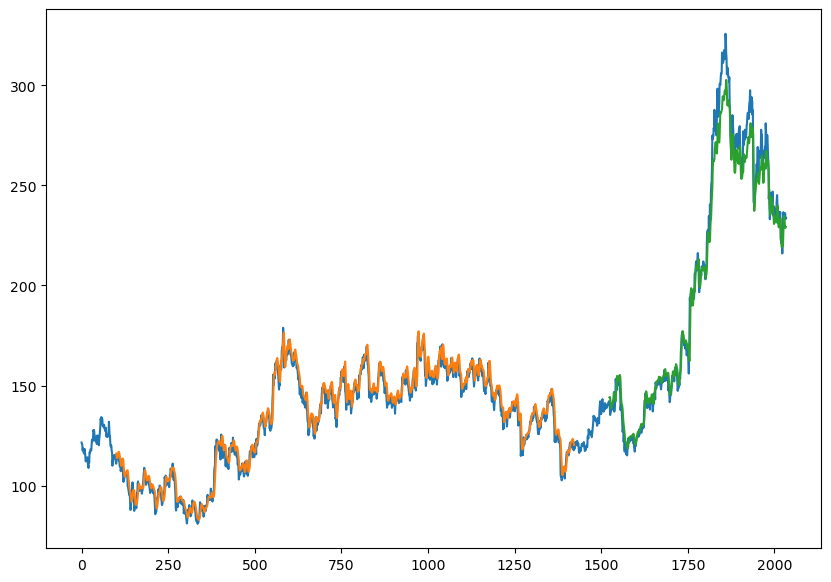

In [25]:
look=100

trainPredicPlot = np.empty_like(cls)
trainPredicPlot[:,:]=np.nan
trainPredicPlot[look:len(train_predic)+look,:]=train_predic

testPredicPlot = np.empty_like(cls)
testPredicPlot[:,:]=np.nan
testPredicPlot[len(train_predic)+(look*2)+1:len(cls)-1,:]=test_predic

plt.figure(figsize=(10,7))
plt.plot(sca.inverse_transform(cls))
plt.plot(trainPredicPlot)
plt.plot(testPredicPlot)

# Prediction for next Month

In [26]:
len(test_data)

611

In [27]:
pred=test_data[511:].reshape(1,-1)
pred.shape

(1, 100)

In [28]:
temp=list(pred)
temp=temp[0].tolist()
temp

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [29]:
lst=[]
n=100
i=0
while(i<30):
    if(len(temp)>100):
        #print Temp
        pred=np.array(temp[1:])
        print("{} day input {}".format(i,pred))
        pred=pred.reshape(1,-1)
        pred=pred.reshape((1,n,1))
        
        yhat=model.predict(pred,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp=temp[1:]
        
        lst.extend(yhat.tolist())
    
    else:
        pred=pred.reshape((1,n,1))
        yhat=model.predict(pred,verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        lst.extend(yhat.tolist())
    i+=1

print(lst)     

[0.6073887]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

# Analyzing last 130 days for Closing price

In [30]:
newday=np.arange(1,101)
predday=np.arange(101,131)
len(cls)

2035

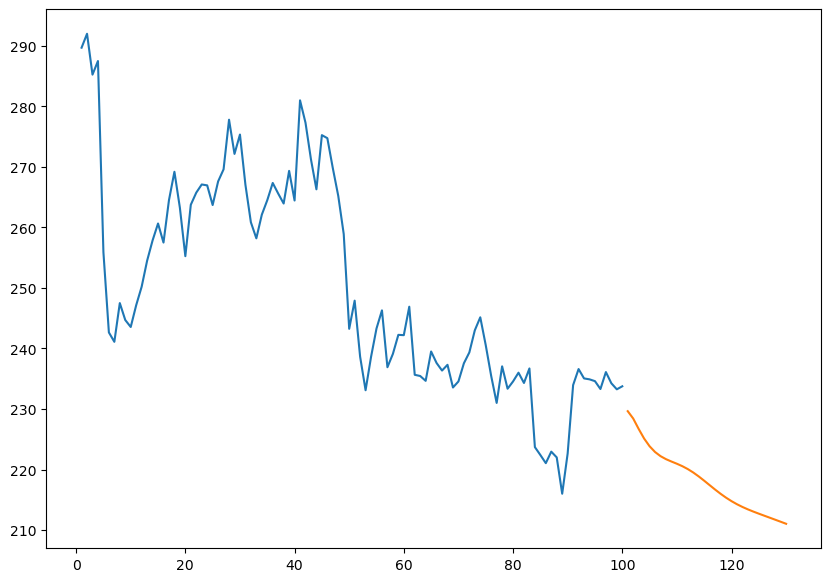

In [31]:
plt.figure(figsize=(10,7))
plt.plot(newday,sca.inverse_transform(cls[1935:]))
plt.plot(predday,sca.inverse_transform(lst))

In [32]:
df=cls.tolist()
df.extend(lst)
print(len(df))

2065


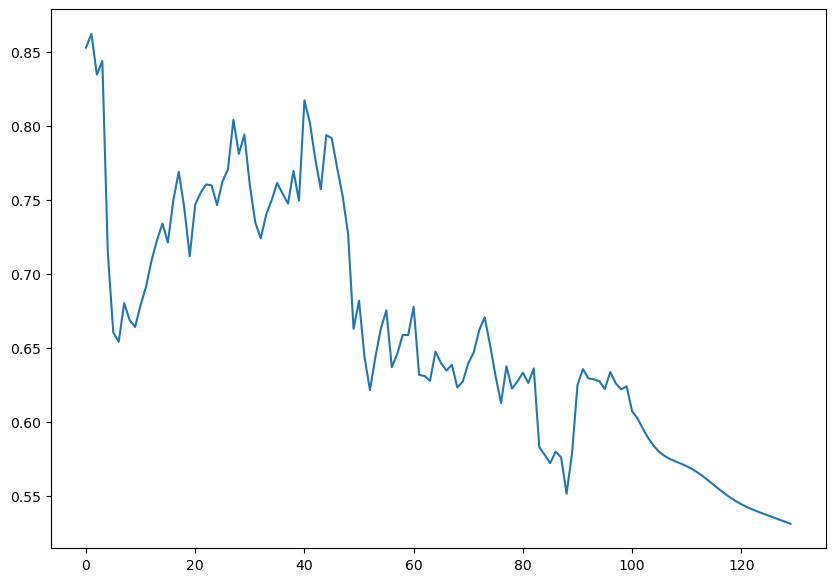

In [33]:
plt.figure(figsize=(10,7))
plt.plot(df[1935:])

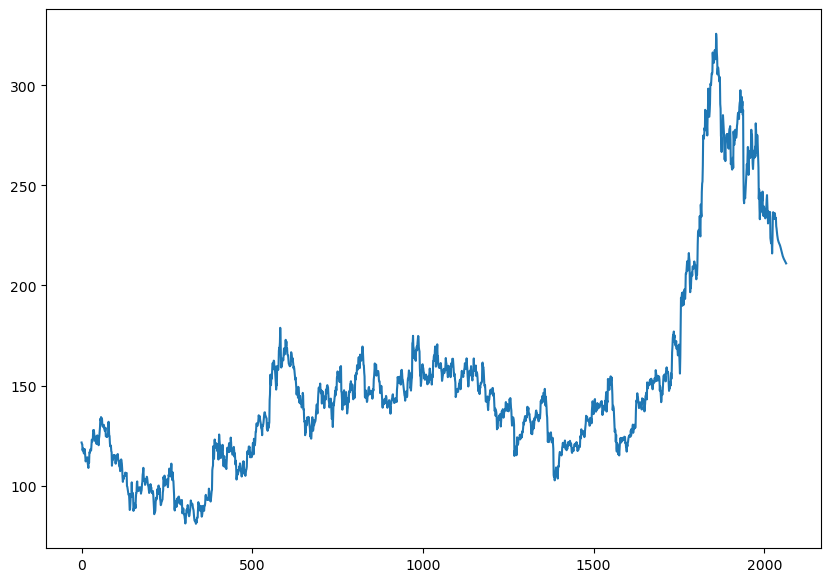

In [34]:
df=sca.inverse_transform(df).tolist()
plt.figure(figsize=(10,7))
plt.plot(df)